In [1]:
import sqlite3
import time
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import SQLite3_functions

In [2]:

# Spécifier le nom de la base de données créée au préalable dans PgAdmin
nom_bdd = "pollution_plo.db"


# Fonction conn appelle la fonction ouvrir_connexion du fichier annexe Python
conn = sqlite3.connect(nom_bdd)

curs = conn.cursor()

In [3]:
# Fonction permettant d'exécuter un requête SQL sur une BDD définie par sa connexion conn
def executer_requete(requete_sql, conn):
    try:
        cursor = conn.cursor()
        cursor.execute(requete_sql)
        conn.commit()
    except sqlite3.Error as e:
        print("Erreur lors de l'execution de la requête")
        print(e)
        return
    cursor.close()

In [4]:
sql_lire_mesures = """
    SELECT *
    FROM mesures_journalieres;
"""

In [5]:
data = pd.read_sql_query(sql_lire_mesures, conn)

In [6]:
data.head()

,code_station,polluant,valeur,unite,date,Année,Mois,statut_valid
0,120,PM10,15.0,microg/m3,2019-12-01,2019,12,1
1,120,PM10,11.0,microg/m3,2019-12-02,2019,12,1
2,120,PM10,21.0,microg/m3,2019-12-03,2019,12,1
3,120,PM10,30.0,microg/m3,2019-12-04,2019,12,1
4,120,PM10,28.0,microg/m3,2019-12-05,2019,12,1


In [7]:
Periode_conf_PM10 = """
    SELECT * 
    FROM mesures_journalieres
    LEFT JOIN localisation L
        ON mesures_journalieres.code_station = L.code_station
    WHERE Mois BETWEEN '3' AND '4' AND statut_valid = 1 AND polluant = 'PM10';
"""

In [8]:
Periode_conf_PM10 = pd.read_sql_query(Periode_conf_PM10, conn)

In [9]:
PM10_Moyenne_Mensuelle = """SELECT MS.code_station AS CS, nom_station, Mois, Année, AVG(valeur) AS Moyenne_Mensuelle
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE Mois BETWEEN '3' AND '4' AND statut_valid = 1 AND polluant = 'PM10'
GROUP BY Mois, CS;
"""

In [10]:
PM10_Moyenne_Mensuelle = pd.read_sql_query(PM10_Moyenne_Mensuelle, conn)

In [11]:
PM10_Moyenne_Mensuelle_2019 = """SELECT MS.code_station AS CS, nom_station, Mois, Année, AVG(valeur) AS Moyenne_Mensuelle
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE Mois BETWEEN '3' AND '4' AND statut_valid = 1 AND polluant = 'PM10' AND Année = '2019'
GROUP BY Mois, CS;
"""

In [12]:
PM10_Moyenne_Mensuelle_2019 = pd.read_sql_query(PM10_Moyenne_Mensuelle_2019, conn)

In [13]:
PM10_Moyenne_Mensuelle_2019.head()

,CS,nom_station,Mois,Année,Moyenne_Mensuelle
0,68,Frossay,3,2019,16.193548
1,70,St-Etienne de Montluc,3,2019,15.580645
2,78,St-Exupéry,3,2019,19.258065
3,107,Chauvinière,3,2019,17.033333
4,110,Blum,3,2019,21.516129


In [14]:
PM10_Moyenne_Mensuelle_2020 = """SELECT MS.code_station AS CS, nom_station, Mois, Année, AVG(valeur) AS Moyenne_Mensuelle
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE Mois BETWEEN '3' AND '4' AND statut_valid = 1 AND polluant = 'PM10' AND Année = '2020'
GROUP BY Mois, CS;
"""

In [15]:
PM10_Moyenne_Mensuelle_2020 = pd.read_sql_query(PM10_Moyenne_Mensuelle_2020, conn)

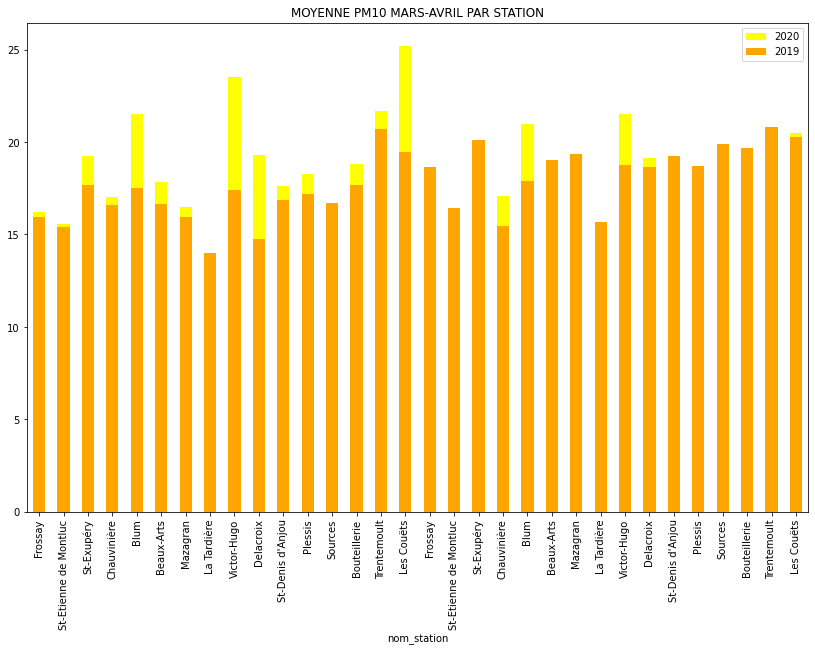

In [16]:
plt.figure(figsize = [14,9])
plt.title("MOYENNE PM10 MARS-AVRIL PAR STATION")
ax = plt.gca()
PM10_Moyenne_Mensuelle_2019.plot(kind='bar',x='nom_station',y='Moyenne_Mensuelle', color='yellow', label='Moyenne 2019', ax=ax)
PM10_Moyenne_Mensuelle_2020.plot(kind='bar',x='nom_station',y='Moyenne_Mensuelle', color='orange', label='Moyenne 2020',ax=ax)
ax.legend(['2020', '2019'])
plt.show()
fig = ax.get_figure()
fig.savefig("MOYENNE_PM10_MARS-AVRIL_PAR_STATION.png")

In [17]:
PM10_Seuil_2019 = """SELECT MS.code_station AS CS, nom_station, date, Mois, Année, MAX(valeur) as valeur
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE date BETWEEN '2019-03-17' AND '2019-05-11' AND statut_valid = 1 AND polluant = 'PM10'
GROUP BY Mois, CS;
"""

In [18]:
PM10_Seuil_2019 = pd.read_sql_query(PM10_Seuil_2019, conn)

In [19]:
PM10_Seuil_2019.head(2)

,CS,nom_station,date,Mois,Année,valeur
0,68,Frossay,2019-03-23,3,2019,31.0
1,70,St-Etienne de Montluc,2019-03-28,3,2019,29.0


In [20]:
PM10_Seuil_2020 = """SELECT MS.code_station AS CS, nom_station, Mois, Année, MAX(valeur) as valeur
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE date BETWEEN '2020-03-17' AND '2020-05-11' AND statut_valid = 1 AND polluant = 'PM10'
GROUP BY Mois, CS;
"""

In [21]:
PM10_Seuil_2020 = pd.read_sql_query(PM10_Seuil_2020, conn)

In [22]:
PM10_Seuil_2020.head(2)

,CS,nom_station,Mois,Année,valeur
0,68,Frossay,3,2020,57.0
1,70,St-Etienne de Montluc,3,2020,55.0


In [23]:
PM10_Seuil_2021 = """SELECT MS.code_station AS CS, nom_station, Mois, Année, MAX(valeur) as valeur
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE date BETWEEN '2021-03-11' AND '2021-05-17' AND statut_valid = 1 AND polluant = 'PM10'
GROUP BY Mois, CS;
"""

In [24]:
PM10_Seuil_2021 = pd.read_sql_query(PM10_Seuil_2021, conn)

In [25]:
PM10_Seuil_2021.head(2)

,CS,nom_station,Mois,Année,valeur
0,68,Frossay,3,2021,17.0
1,70,St-Etienne de Montluc,3,2021,16.0


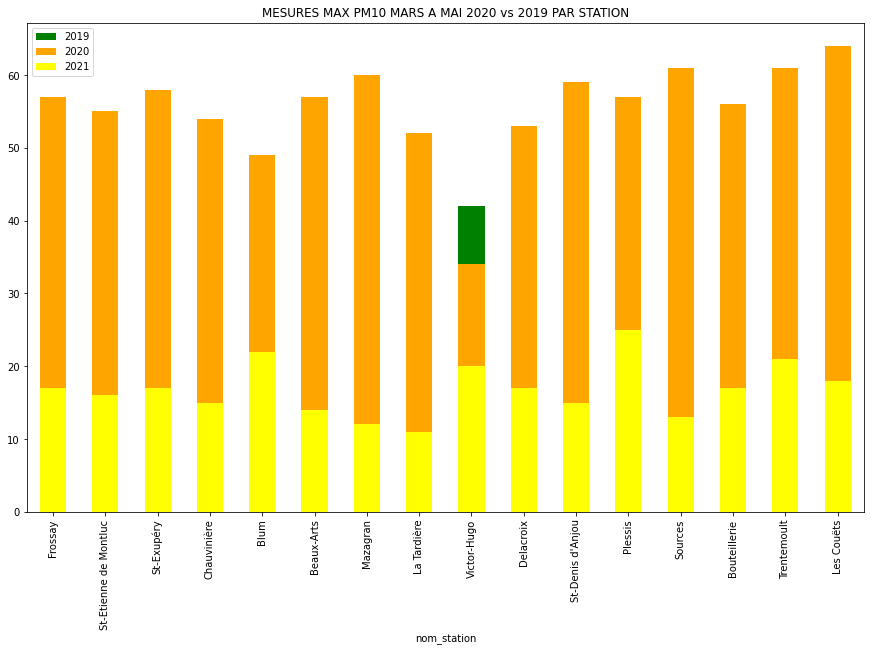

In [26]:
plt.figure(figsize = [15,9])
plt.title("MESURES MAX PM10 MARS A MAI 2020 vs 2019 PAR STATION")
ax = plt.gca()
PM10_Seuil_2019.plot(kind='bar',x='nom_station',y='valeur', color='green', ax=ax)
PM10_Seuil_2020.plot(kind='bar',x='nom_station',y='valeur', color='orange', ax=ax)
PM10_Seuil_2021.plot(kind='bar',x='nom_station',y='valeur', color='yellow', ax=ax)
ax.legend(['2019','2020', '2021'])
plt.show()

In [27]:
df_pivot = pd.pivot_table(
    PM10_Seuil_2019, 
    values="valeur",
    index="nom_station",
    columns="Année", 
    aggfunc=np.mean
)

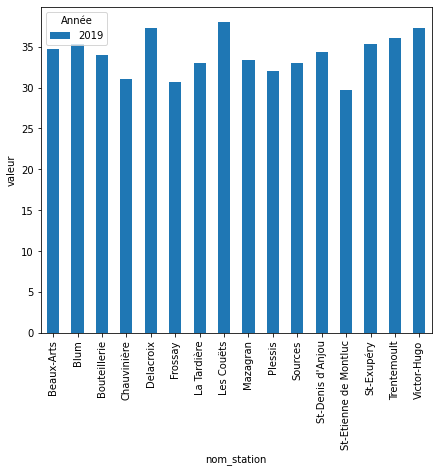

In [28]:
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("nom_station")
ax.set_ylabel("valeur")
# Use this to show the plot in a new window
plt.show()
# Export the plot as a PNG file
# fig.savefig("page_views_barplot.png")

In [29]:
PM10_MOYENNE_ANNUELLE_2019 = """SELECT MS.code_station AS CS, nom_station, Année, AVG(valeur) AS Moyenne_ANNUELLE
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE polluant = 'PM10' AND Année = '2019'
GROUP BY CS, Année;
"""

In [30]:
PM10_MOYENNE_ANNUELLE_2019 = pd.read_sql_query(PM10_MOYENNE_ANNUELLE_2019, conn)

In [31]:
PM10_MOYENNE_ANNUELLE_2019.head(2)

,CS,nom_station,Année,Moyenne_ANNUELLE
0,68,Frossay,2019,11.940874
1,70,St-Etienne de Montluc,2019,11.522193


In [32]:
PM10_MOYENNE_ANNUELLE_2020 = """SELECT MS.code_station AS CS, nom_station, Année, AVG(valeur) AS Moyenne_ANNUELLE
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE polluant = 'PM10' AND Année = '2020'
GROUP BY CS, Année;
"""

In [33]:
PM10_MOYENNE_ANNUELLE_2020 = pd.read_sql_query(PM10_MOYENNE_ANNUELLE_2020, conn)

In [34]:
PM10_MOYENNE_ANNUELLE_2020.head(2)

,CS,nom_station,Année,Moyenne_ANNUELLE
0,68,Frossay,2020,13.564738
1,70,St-Etienne de Montluc,2020,11.542857


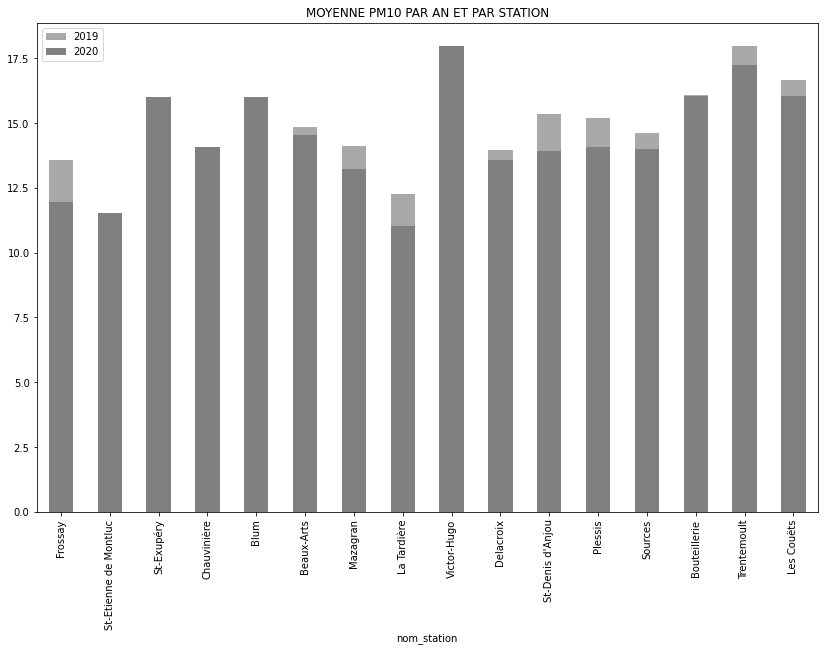

In [35]:
plt.figure(figsize = [14,9])
plt.title("MOYENNE PM10 PAR AN ET PAR STATION")
ax = plt.gca()
fig = ax.get_figure()
PM10_MOYENNE_ANNUELLE_2020.plot(kind='bar',x='nom_station',y='Moyenne_ANNUELLE', color='darkgrey', ax=ax)
PM10_MOYENNE_ANNUELLE_2019.plot(kind='bar',x='nom_station',y='Moyenne_ANNUELLE', color='grey', ax=ax)
ax.legend(['2019', '2020'])
plt.show()
fig.savefig("MOYENNE_PM10_PAR_AN_ET_PAR_STATION.png")

In [36]:
PM10_Mars2019 = """
    SELECT * 
    FROM mesures_journalieres
    LEFT JOIN localisation L
        ON mesures_journalieres.code_station = L.code_station
    WHERE date BETWEEN '2019-03-17' AND '2019-05-11' AND statut_valid = 1 AND polluant = 'PM10'
    ;
"""

In [37]:
data_PM10_2019 = pd.read_sql_query(PM10_Mars2019, conn)

In [38]:
data_PM10_2019.head()

,code_station,polluant,valeur,unite,date,Année,Mois,statut_valid,code_station,nom_departement,nom_com,code_insee_com,nom_station,typologie,x_reglementaire,y_reglementaire
0,120,PM10,7.0,microg/m3,2019-03-17,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
1,120,PM10,12.0,microg/m3,2019-03-18,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
2,120,PM10,12.0,microg/m3,2019-03-19,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
3,120,PM10,20.0,microg/m3,2019-03-20,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
4,120,PM10,23.0,microg/m3,2019-03-21,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06


In [39]:
PM10_Mars2020 = """
    SELECT * 
    FROM mesures_journalieres
    LEFT JOIN localisation L
        ON mesures_journalieres.code_station = L.code_station
    WHERE date BETWEEN '2020-03-17' AND '2020-05-11' AND statut_valid = 1 AND polluant = 'PM10'
    ;
"""

In [40]:
data_PM10_2020 = pd.read_sql_query(PM10_Mars2020, conn)

In [41]:
data_PM10_2020.head()

,code_station,polluant,valeur,unite,date,Année,Mois,statut_valid,code_station,nom_departement,nom_com,code_insee_com,nom_station,typologie,x_reglementaire,y_reglementaire
0,123,PM10,22.0,microg/m3,2020-03-17,2020,3,1,123,Mayenne,Laval,53130,Mazagran,urban,419447.055138,6.781027e+06
1,123,PM10,21.0,microg/m3,2020-03-18,2020,3,1,123,Mayenne,Laval,53130,Mazagran,urban,419447.055138,6.781027e+06
2,123,PM10,23.0,microg/m3,2020-03-19,2020,3,1,123,Mayenne,Laval,53130,Mazagran,urban,419447.055138,6.781027e+06
3,123,PM10,30.0,microg/m3,2020-03-20,2020,3,1,123,Mayenne,Laval,53130,Mazagran,urban,419447.055138,6.781027e+06
4,123,PM10,22.0,microg/m3,2020-03-21,2020,3,1,123,Mayenne,Laval,53130,Mazagran,urban,419447.055138,6.781027e+06


In [42]:
df_pivot = pd.pivot_table(
    Periode_conf_PM10, 
    values="valeur",
    index="Année",
    columns="Mois", 
    aggfunc=np.mean
)

In [43]:
df_pivot2 = pd.pivot_table(
    Periode_conf_PM10, 
    values="valeur",
    index="Année",
    columns="nom_station", 
    aggfunc=np.mean
)

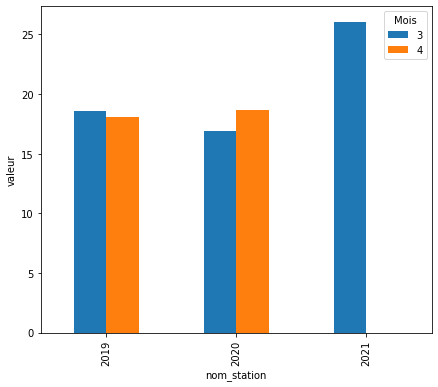

In [44]:
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("nom_station")
ax.set_ylabel("valeur")
# Use this to show the plot in a new window
plt.show()
# Export the plot as a PNG file
# fig.savefig("page_views_barplot.png")

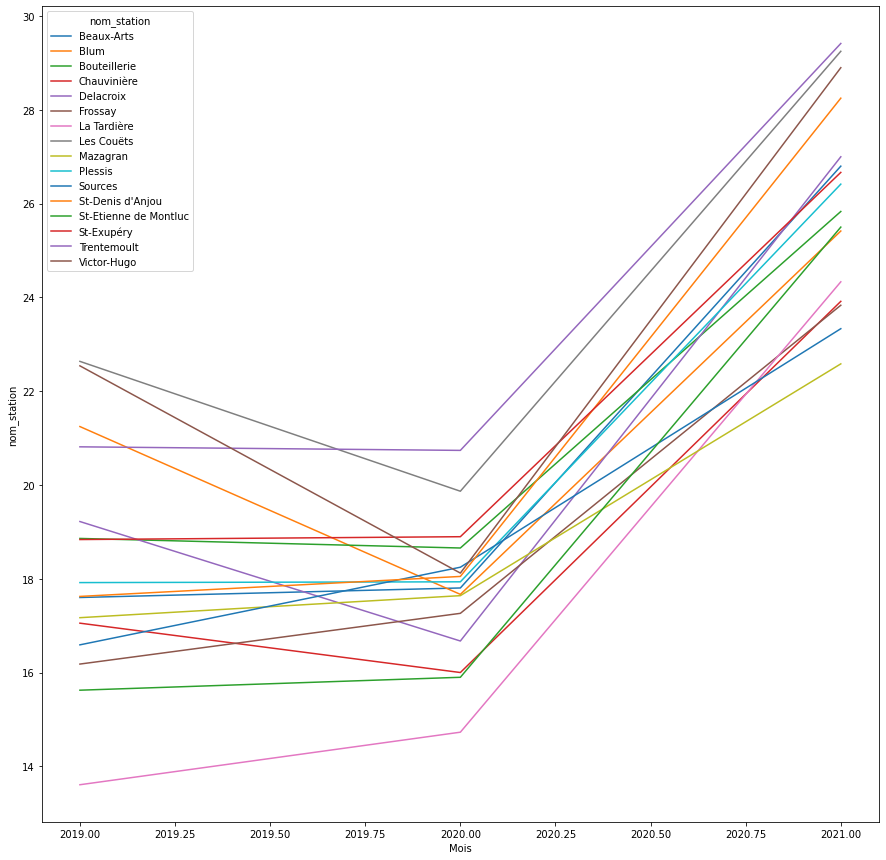

In [45]:
ax = df_pivot2.plot(kind="line")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15, 15)
# Change the axes labels
ax.set_xlabel("Mois")
ax.set_ylabel("nom_station")
# Use this to show the plot in a new window
plt.show()
# Export the plot as a PNG file
# fig.savefig("page_views_barplot.png")

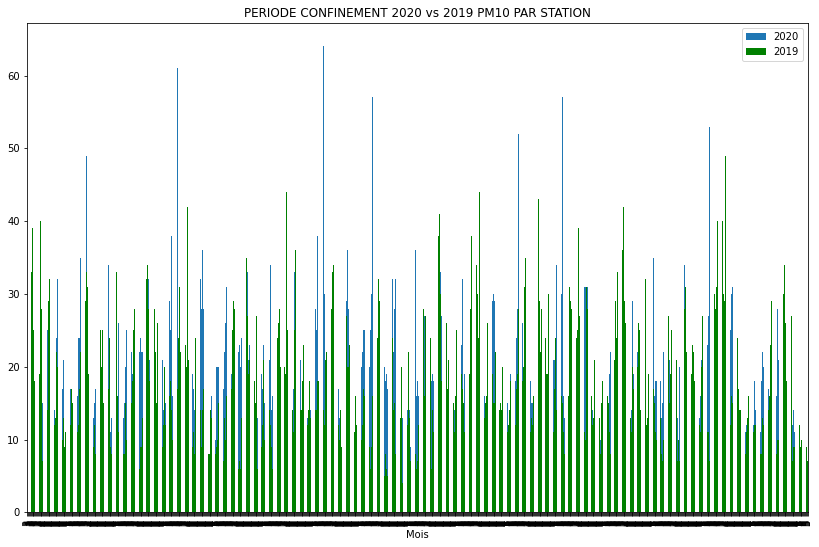

In [46]:
plt.figure(figsize = [14,9])
plt.title("PERIODE CONFINEMENT 2020 vs 2019 PM10 PAR STATION")
ax = plt.gca()
data_PM10_2020.plot(kind='bar',x='Mois',y='valeur', ax=ax)
data_PM10_2019.plot(kind='bar',x='Mois',y='valeur', color='green', ax=ax)
ax.legend(['2020', '2019'])
plt.show()

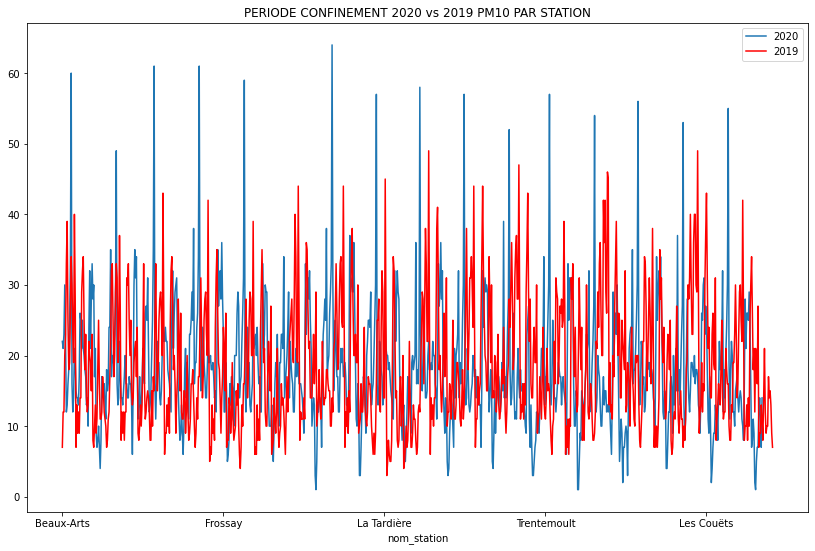

In [47]:
plt.figure(figsize = [14,9])
plt.title("PERIODE CONFINEMENT 2020 vs 2019 PM10 PAR STATION")
ax = plt.gca()
hue='valeur'
data_PM10_2020.plot(kind='line',x='nom_station',y='valeur',ax=ax)
data_PM10_2019.plot(kind='line',x='nom_station',y='valeur', color='red', ax=ax)
ax.legend(['2020', '2019'])
plt.show()

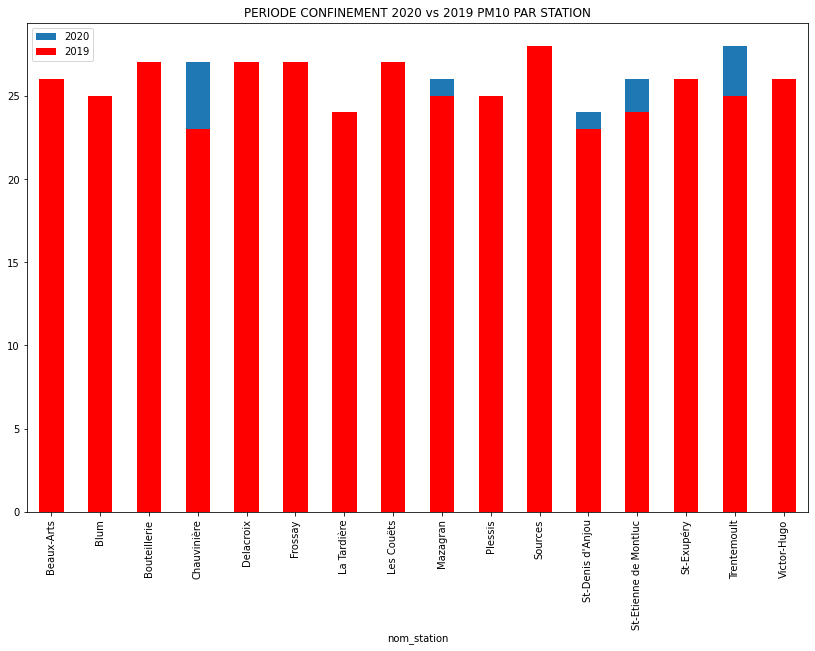

In [48]:
# Méthode .figure pour définir de la taille du graphique
plt.figure(figsize = [14,9])
plt.title("PERIODE CONFINEMENT 2020 vs 2019 PM10 PAR STATION")
ax = plt.gca()
data_PM10_2020.groupby('nom_station')['valeur'].nunique().plot(kind='bar', ax=ax)
data_PM10_2019.groupby('nom_station')['valeur'].nunique().plot(kind='bar', color='red', ax=ax)
ax.legend(['2020', '2019'])
plt.show()

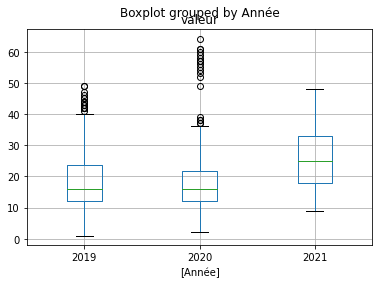

In [49]:
Periode_conf_PM10.boxplot(column=['valeur'], by=['Année'])
plt.show()

In [50]:
PM10_Mars2019_15 = """
    SELECT * 
    FROM mesures_journalieres
    LEFT JOIN localisation L
        ON mesures_journalieres.code_station = L.code_station
    WHERE date BETWEEN '2019-03-01' AND '2019-04-31' AND statut_valid = 1 AND polluant = 'PM10'
    GROUP BY date
    ;
"""

In [51]:
PM10_Mars2019_15 = pd.read_sql_query(PM10_Mars2019_15, conn)

In [52]:
PM10_Mars2019_15.head()

,code_station,polluant,valeur,unite,date,Année,Mois,statut_valid,code_station,nom_departement,nom_com,code_insee_com,nom_station,typologie,x_reglementaire,y_reglementaire
0,120,PM10,23.0,microg/m3,2019-03-01,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
1,120,PM10,16.0,microg/m3,2019-03-02,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
2,120,PM10,13.0,microg/m3,2019-03-03,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
3,120,PM10,11.0,microg/m3,2019-03-04,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
4,120,PM10,14.0,microg/m3,2019-03-05,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06


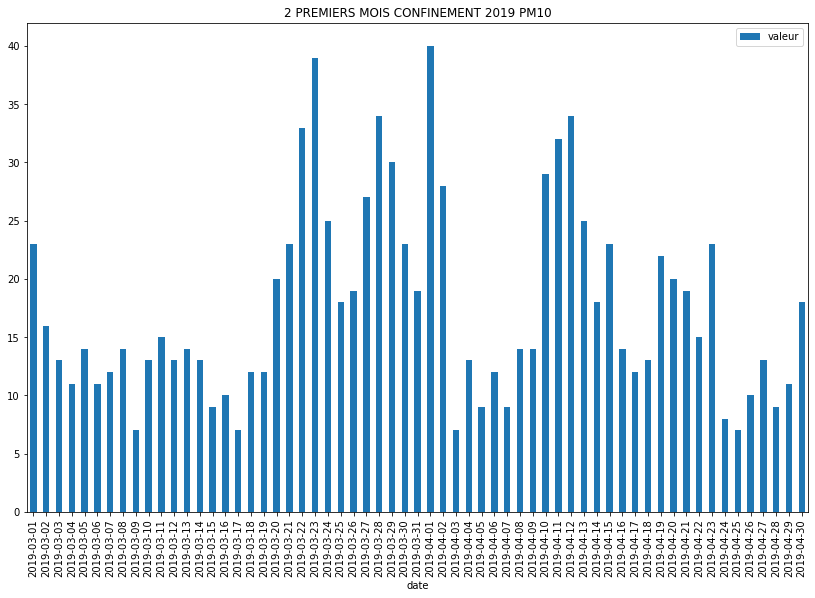

In [53]:
plt.figure(figsize = [14,9])
plt.title("2 PREMIERS MOIS CONFINEMENT 2019 PM10")
ax = plt.gca()
fig = ax.get_figure()
PM10_Mars2019_15.plot(kind='bar',x='date',y='valeur', ax=ax)
plt.show()
fig.savefig("2_Premiers_mois_conf_PM10.png")

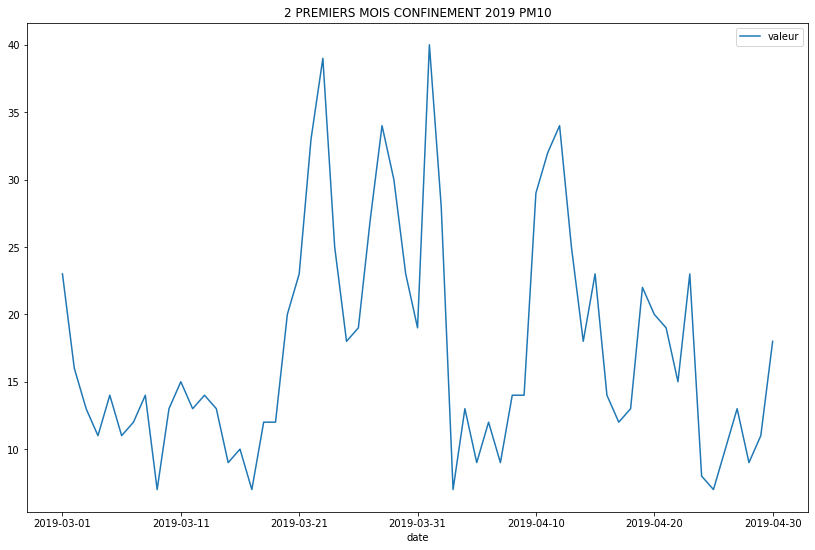

In [54]:
plt.figure(figsize = [14,9])
plt.title("2 PREMIERS MOIS CONFINEMENT 2019 PM10")
ax = plt.gca()
fig = ax.get_figure()
PM10_Mars2019_15.plot(kind='line',x='date',y='valeur', ax=ax)
plt.show()
fig.savefig("2_Premiers_mois_conf_PM10.png")

In [56]:
conn.close()